In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

ImportError: cannot import name 'LogisticRegression' from 'sklearn' (/Users/himanshuchatterjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/__init__.py)

Creating some data with multiple classes

In [7]:
# dataset creation with 3 classes
from sklearn.datasets import make_classification

X, y = make_classification(n_samples= 498,
                           n_features= 2,
                           n_classes = 3,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=5)
y=y.reshape(len(y), 1)

print(X.shape, y.shape)

(498, 2) (498, 1)


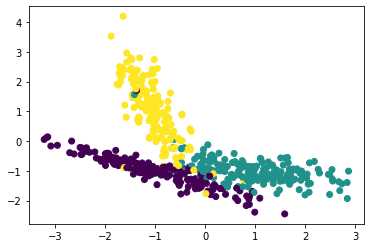

In [8]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=4)
X_train.shape

(298, 2)

In [14]:
model = LogisticRegression(multi_class='ovr')
# fit model
model.fit(X_train, y_train)

/Users/himanshuchatterjee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(multi_class='ovr')

In [15]:
print(f'Training Accuracy:{model.score(X_train,y_train)}')
print(f'Validation Accuracy :{model.score(X_val,y_val)}')
print(f'Test Accuracy:{model.score(X_test,y_test)}')

Training Accuracy:0.9161073825503355
Validation Accuracy :0.91
Test Accuracy:0.91


In [16]:
n_labels = len(np.unique(y_train))

for i in range(n_labels):
    sub_model = LogisticRegression(penalty=model.penalty, C=model.C)
    sub_model.coef_ = model.coef_[i].reshape(1, -1)
    sub_model.intercept_ = model.intercept_[i].reshape(-1, 1)
    sub_model.classes_ = np.array([0, 1])

    y_train_ovr = np.where(y_train == i, 1, 0)
    score = sub_model.score(X_train, y_train_ovr)

    print(f"OVR for label={i}, score={score:.4f}")

OVR for label=0, score=0.9664
OVR for label=1, score=0.9060
OVR for label=2, score=0.9362


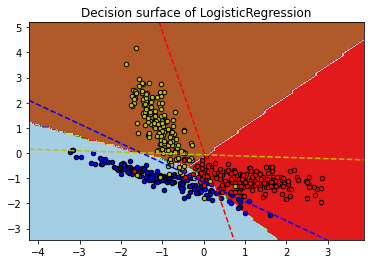

In [17]:
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(model, X, response_method="predict", cmap=plt.cm.Paired, ax=ax)
plt.title("Decision surface of LogisticRegression")
plt.axis("tight")

# Plot also the training points
colors = "bry"
for i, color in zip(model.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor="black", s=20
        )


# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = model.coef_
intercept = model.intercept_

def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

        plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)

for i, color in zip(model.classes_, colors):
        plot_hyperplane(i, color)

plt.show()